In [1]:

import project_path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

In [2]:
%load_ext autoreload
%autoreload 2

In [14]:
HUMAN_SESSION = 'e63ddf' #"b6cb6e"

In [72]:
#followup_matrix = np.load(f"../data/eye_tracking_attention/eye_v10/decay_0.1/data_followup_tokens_tokens_model/{HUMAN_SESSION}.npy")
#followup_matrix = np.load(f"../data/eye_tracking_attention/eye_v10/decay_0.1_Salesforce_codegen-16B-multi/data_followup_tokens_tokens_model/{HUMAN_SESSION}.npy")
followup_matrix = np.load(f"../data/eye_tracking_attention/eye_v10/decay_0.1_Salesforce_codegen-16B-multi/data_followup_tokens_tokens/{HUMAN_SESSION}.npy")

In [73]:
from attwizard.script.utils import load_json_file 
tokenization_model_w_weights = load_json_file(f"../data/eye_tracking_attention/eye_v10/att_weights_Salesforce_codegen-16B-multi/metadata/{HUMAN_SESSION}.json")


In [74]:
# count how many empty rows followup matrix has
n_empty_rows = 0
lines_no_next_token = []
for i_row in range(followup_matrix.shape[0]):
    if np.sum(followup_matrix[i_row, :]) == 0:
        n_empty_rows += 1
        lines_no_next_token.append(i_row)
print(f"Number of empty rows: {n_empty_rows}")

Number of empty rows: 105


In [75]:
followup_matrix.shape[0]

291

In [76]:
print("FV")
for i in range(followup_matrix.shape[0]):
    if np.sum(followup_matrix[i, :]) == 0:
        print("X", end="")
    else:
        print(".", end="")
    if tokenization_model_w_weights[i]['w'] == 0:
        print("X", end="")
    else:
        print(".", end="")
    print(f" (i={i}, t={tokenization_model_w_weights[i]['t']})")

FV
XX (i=0, t=/)
XX (i=1, t=********************************)
XX (i=2, t=********************************)
XX (i=3, t=********************************)
XX (i=4, t=*/)
XX (i=5, t=

)
XX (i=6, t=
)
XX (i=7, t=/*)
XX (i=8, t=
)
XX (i=9, t=#)
.. (i=10, t= In)
.. (i=11, t= the)
.. (i=12, t= Tower)
XX (i=13, t= of)
XX (i=14, t= H)
XX (i=15, t=ano)
XX (i=16, t=i)
XX (i=17, t= problem)
XX (i=18, t= you)
XX (i=19, t= have)
XX (i=20, t= to)
XX (i=21, t= move)
XX (i=22, t= all)
XX (i=23, t= the)
XX (i=24, t= disks)
XX (i=25, t=
)
XX (i=26, t=
)
XX (i=27, t=#)
XX (i=28, t= from)
XX (i=29, t= the)
XX (i=30, t= left)
XX (i=31, t= hand)
XX (i=32, t= post)
XX (i=33, t= to)
XX (i=34, t= the)
XX (i=35, t= right)
XX (i=36, t= hand)
XX (i=37, t= post)
XX (i=38, t=.)
XX (i=39, t=
)
XX (i=40, t=
)
.. (i=41, t=#)
.. (i=42, t= You)
XX (i=43, t= can)
XX (i=44, t= only)
XX (i=45, t= move)
XX (i=46, t= the)
XX (i=47, t= disks)
XX (i=48, t= one)
XX (i=49, t= at)
XX (i=50, t= a)
.. (i=51, t= time)
.. (i=52, t= and

IndexError: list index out of range

In [67]:
# count how many tokens have no weight (field w == 0)
n_empty_weights = 0
lines_empty_weights = []
for token in tokenization_model_w_weights:
    if token["w"] == 0:
        n_empty_weights += 1
        lines_empty_weights.append(token["i"])
        if token["i"] not in lines_no_next_token:
            top_next_token = np.argmax(followup_matrix[token["i"], :])
            print(f"Token {token} was never attended but has next token (dist. sum. {np.sum(followup_matrix[token['i'], :])}")
            print(f"Next token: {tokenization_model_w_weights[top_next_token]['t']}")
            print('='*80)
    else:
        if token["i"] in lines_no_next_token:
            print(f"Token {token} was attended but has no next token")
            print('='*80)
print(f"Number of empty weights: {n_empty_weights}")

Token {'s': 105, 'i': 9, 'c': 0, 'l': 4, 't': '#', 'w': 0.0, 'model': 'Salesforce/codegen-16B-multi', 'id': 'e63ddf'} was never attended but has next token (dist. sum. 26.20674705505371
Next token:  "
Token {'s': 113, 'i': 12, 'c': 8, 'l': 4, 't': ' Tower', 'w': 1.45698, 'model': 'Salesforce/codegen-16B-multi', 'id': 'e63ddf'} was attended but has no next token
Token {'s': 219, 'i': 40, 'c': 0, 'l': 7, 't': '\n', 'w': 0.0, 'model': 'Salesforce/codegen-16B-multi', 'id': 'e63ddf'} was never attended but has next token (dist. sum. 26.210697174072266
Next token:  "
Token {'s': 221, 'i': 42, 'c': 1, 'l': 8, 't': ' You', 'w': 2.26416, 'model': 'Salesforce/codegen-16B-multi', 'id': 'e63ddf'} was attended but has no next token
Token {'s': 256, 'i': 50, 'c': 36, 'l': 8, 't': ' a', 'w': 0.0, 'model': 'Salesforce/codegen-16B-multi', 'id': 'e63ddf'} was never attended but has next token (dist. sum. 26.174354553222656
Next token:  "
Token {'s': 267, 'i': 53, 'c': 47, 'l': 8, 't': ' you', 'w': 0.777

In [65]:
len(tokenization_model_w_weights)

283

In [48]:
# compute the intersection between the two sets
lines_no_next_token = set(lines_no_next_token) 
lines_empty_weights = set(lines_empty_weights)
intersection = lines_no_next_token.intersection(lines_empty_weights)
print(f"Intersection: {len(intersection)}")

Intersection: 64


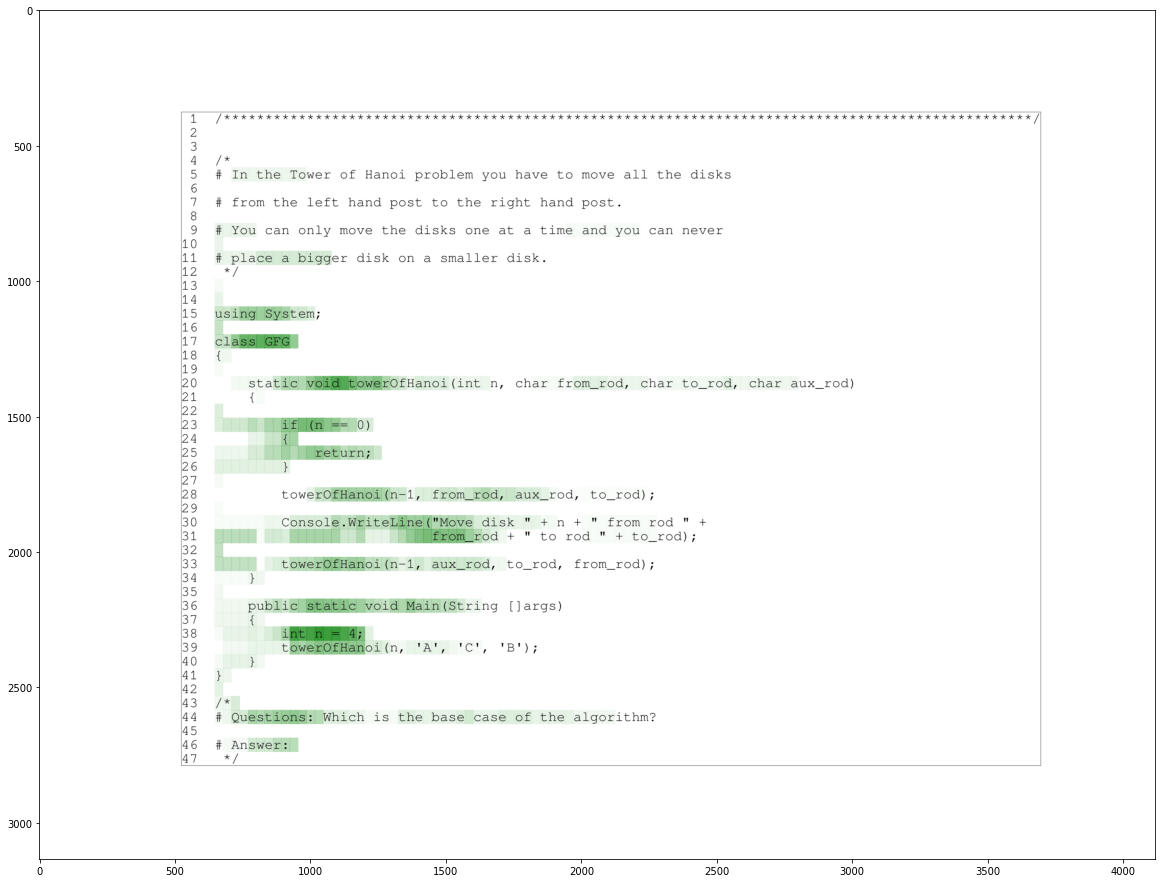

In [49]:
IMAGE = '../data/eye_tracking_attention/eye_v10/code_heatmap/e63ddf.png'
# plot image
plt.figure(figsize=(20, 20))
img = plt.imread(IMAGE)
plt.imshow(img)

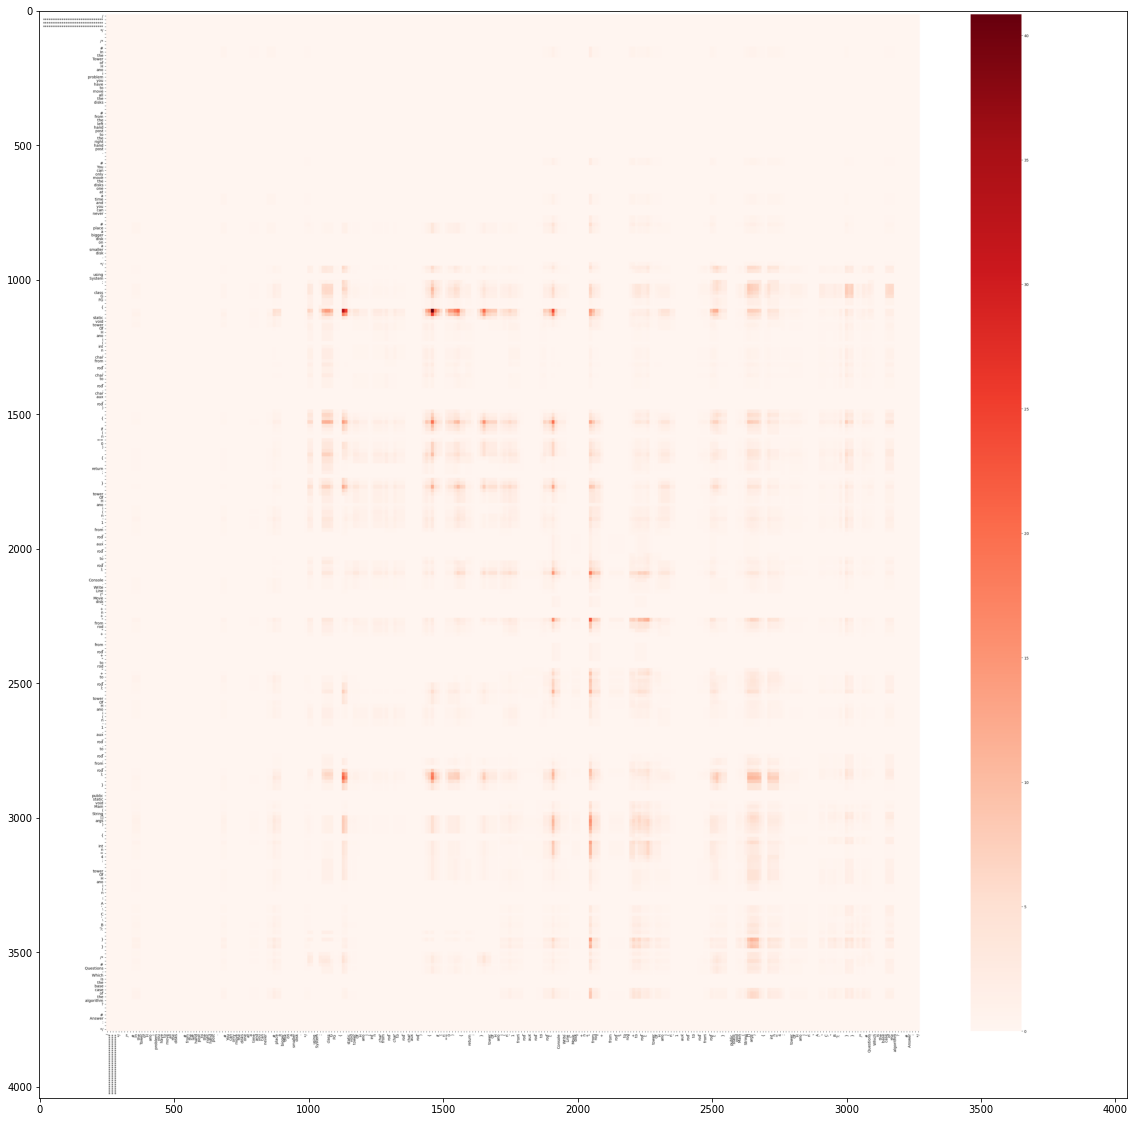

In [33]:
# plot followup matrix
FOLLOWUP_MATRIX = '../data/eye_tracking_attention/eye_v10/decay_0.1/img_followup_tokens_tokens_model/e63ddf.png'
plt.figure(figsize=(20, 20))
img = plt.imread(FOLLOWUP_MATRIX)
plt.imshow(img)

In [41]:
# check if the from event at line 33 which doesn't receive any attention is present in the 
# csv with intermediate_char_events
# ================================================================================
# Token {'s': 721, 'i': 208, 'c': 42, 'l': 32, 't': ' from', 'w': 0.0, 'model': 'Salesforce/codegen-16B-multi', 'id': 'e63ddf'} 
# was never attended but has next token (dist. sum. 100.06842803955078
# Next token:  "
INTERMEDIATE_EVENTS = '../data/eye_tracking_attention/eye_v10/intermediate_char_events/e63ddf.csv'
df_char_events = pd.read_csv(INTERMEDIATE_EVENTS)
df_char_events = df_char_events[(df_char_events["line"] == 33) & (df_char_events["column"] >= 42) & (df_char_events["column"] <= 46)]

In [43]:
df_char_events.head(30)

,line,column,time,time_spent
1422,33,42,0.0,0.0
1423,33,43,0.0,0.0
1424,33,44,0.0,0.0
1425,33,45,0.0,0.0
1426,33,46,0.0,0.0


In [78]:
m = np.load('../data/model_output/exp_v10/codegen/vector_naive_max_plus_mean_of_followers/tree_Q2.py_0_Salesforce_codegen-16B-multi.npy')
m.shape

(526,)